#Preguntas

1.- De los pacientes positivos a covid ¿Cuantos fueron mexicanos? (Nacionalidad)

1.1.- De los pacientes positivos a covid ¿Cuantos fueron extrangeros?




2.-¿Cuál fue la enfermedad que causo mas defunciones en México?



3.- ¿Cuál fue el estado con mayor casos positivos COVID?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Carga de la información

In [3]:
path = 'COVID19MEXICO.csv'
path_state = 'estados.csv'

##Carga Data Set del archivo principal

In [4]:
df = pd.read_csv(path)
df.sample(10)

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2023-07-11,0ed066,2,12,16,2,16,16,41,1,...,2,2,97,1,2,7,99,México,97,97
1,2023-07-11,c4ec68,2,12,9,1,4,9,9,1,...,2,2,97,1,2,7,99,México,97,97
2,2023-07-11,b6d4ff,2,12,9,1,9,9,9,1,...,2,2,97,1,2,7,99,México,97,97
3,2023-07-11,c92b92,1,12,7,2,7,7,101,1,...,2,2,97,2,97,6,99,México,97,97
4,2023-07-11,4967a9,2,12,7,2,7,7,108,1,...,2,2,97,2,97,6,99,México,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976365,2023-07-11,m181e49,2,12,15,1,15,15,999,1,...,99,1,4,2,97,6,99,México,97,97
976366,2023-07-11,m07b940,2,12,15,1,15,15,999,1,...,99,1,4,2,97,6,99,México,97,97
976367,2023-07-11,m12eff4,2,3,15,2,15,15,999,1,...,99,2,97,1,2,7,99,México,97,97
976368,2023-07-11,m184665,2,12,15,2,15,15,999,1,...,99,1,4,2,97,6,99,México,97,97


In [ ]:
df.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA_LAB', 'RESULTADO_LAB',
       'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO', 'CLASIFICACION_FINAL',
       'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')

##Estados

In [ ]:
df_states = pd.read_csv(path_state)
df_states

,clave,estado,abreviatura
0,1,Aguascalientes,Ags.
1,10,Durango,Dgo.
2,11,Guanajuato,Gto.
3,12,Guerrero,Gro.
4,13,Hidalgo,Hgo.
5,14,Jalisco,Jal.
6,15,MÃ©xico,Mex.
7,16,Michoac,Mich.
8,17,Morelos,Mor.
9,18,Nayarit,Nay.


###Eliminar columnas

In [ ]:
del df_states['abreviatura']
x = ['MÃ©xico','Ciudad de M','Veracruz de Ignacio de la Llave','Quer']
y= ['México','CDMX','Veracruz','Querétaro']
df_states['estado'].replace(x , y , inplace=True)
df_states

,clave,estado
0,1,Aguascalientes
1,10,Durango
2,11,Guanajuato
3,12,Guerrero
4,13,Hidalgo
5,14,Jalisco
6,15,México
7,16,Michoac
8,17,Morelos
9,18,Nayarit


#Preguta 1

1.- De los pacientes positivos a covid ¿Cuantos fueron mexicanos? (Nacionalidad)


1.1.- De los pacientes positivos a covid ¿Cuantos fueron extrangeros?

In [ ]:
df_1 = df.copy()


In [ ]:
df_1.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA_LAB', 'RESULTADO_LAB',
       'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO', 'CLASIFICACION_FINAL',
       'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')

##Eliminar columnas

In [ ]:
columnas_mantener = ['NACIONALIDAD','RESULTADO_ANTIGENO','PAIS_NACIONALIDAD']

df_1 = df_1.drop(columns = [col for col in df_1.columns if col not in columnas_mantener])

df_1.columns

Index(['NACIONALIDAD', 'RESULTADO_ANTIGENO', 'PAIS_NACIONALIDAD'], dtype='object')

##Aplicando filtrado

**Catálogo NACIONALIDAD**  
1 = MEXICANA  
2 = EXTRANJERA  
99 = NO ESPECIFICADO



**Catálogo 'RESULTADO_ANTIGENO**  
1 = POSITIVO A SARS-COV-2  
2 = NEGATIVO A SARS-COV-2  
97 = NO APLICA (CASO SIN MUESTRA)

###Positivos

In [ ]:
positivos = df_1[df_1['RESULTADO_ANTIGENO'] == 1]
positivos


,NACIONALIDAD,RESULTADO_ANTIGENO,PAIS_NACIONALIDAD
9,1,1,México
10,1,1,México
11,1,1,México
22,1,1,México
25,1,1,México
...,...,...,...
976300,1,1,México
976311,1,1,México
976321,1,1,México
976329,1,1,México


###Mexicanos

In [ ]:
mexicanos = positivos[positivos['NACIONALIDAD'] == 1]
mexicanos

,NACIONALIDAD,RESULTADO_ANTIGENO,PAIS_NACIONALIDAD
9,1,1,México
10,1,1,México
11,1,1,México
22,1,1,México
25,1,1,México
...,...,...,...
976300,1,1,México
976311,1,1,México
976321,1,1,México
976329,1,1,México


###Extrangeros

In [ ]:
extrangeros = positivos[ positivos['NACIONALIDAD'] == 2 ]
extrangeros

,NACIONALIDAD,RESULTADO_ANTIGENO,PAIS_NACIONALIDAD
277,2,1,Bolivia
639,2,1,Venezuela
990,2,1,Estados Unidos de América
991,2,1,Chile
1059,2,1,Estados Unidos de América
...,...,...,...
963772,2,1,Colombia
963989,2,1,Venezuela
965106,2,1,Argentina
966874,2,1,Perú


##De los pacientes positivos a covid ¿Cuantos fueron mexicanos? **R: 325528**


In [ ]:
total_mex = len(mexicanos)
total_mex

325528

##De los pacientes positivos a covid ¿Cuantos fueron extrangeros? **R: 738**

In [ ]:
total_ext = len(extrangeros)
total_ext

738

##Gráfico

In [ ]:
x = ['Mexicanos','Extrangeros']
y = [total_mex,total_ext]


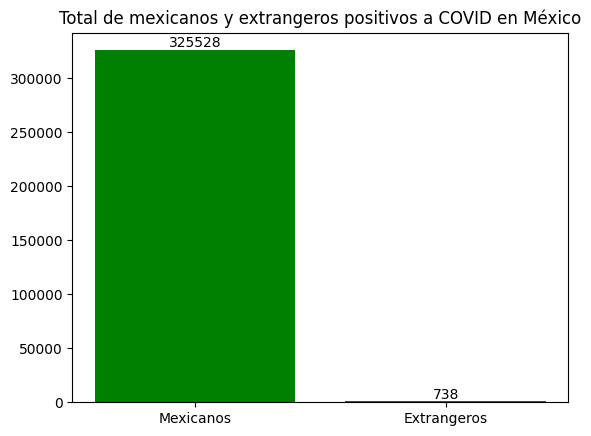

In [ ]:
plt.title('Total de mexicanos y extrangeros positivos a COVID en México')

plt.bar(x,y, color='g')

for i in range(len(x)): plt.text(i, y[i], str(y[i]), ha='center', va='bottom')

plt.show()

#Pregunta 2

¿Cuál fue la enfermedad que causo mas defunciones en México?

In [ ]:
df_2 = df.copy()

In [ ]:
df_2.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA_LAB', 'RESULTADO_LAB',
       'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO', 'CLASIFICACION_FINAL',
       'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')

##Eliminar columnas

In [ ]:
cols = ['FECHA_DEF',  'NACIONALIDAD','NEUMONIA', 'EMBARAZO',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRA_COM']

df_2 = df_2.drop(columns = [col for col in df_2.columns if col not in cols])

df_2.columns

Index(['FECHA_DEF', 'NEUMONIA', 'NACIONALIDAD', 'EMBARAZO', 'DIABETES', 'EPOC',
       'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR',
       'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO'],
      dtype='object')

In [ ]:
df_2[:10]

,FECHA_DEF,NEUMONIA,NACIONALIDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO
0,9999-99-99,2,1,97,2,2,2,2,2,2,2,2,2,1
1,9999-99-99,2,1,2,2,2,2,2,2,2,2,2,2,2
2,9999-99-99,2,1,2,2,2,2,2,2,2,2,2,2,2
3,9999-99-99,2,1,97,2,2,2,2,2,2,2,2,2,2
4,9999-99-99,2,1,97,2,2,2,2,2,2,2,2,2,1
5,9999-99-99,2,1,2,2,2,2,2,2,2,2,2,2,2
6,9999-99-99,2,1,2,2,2,2,2,2,2,2,2,2,2
7,9999-99-99,2,1,2,2,2,2,2,1,2,2,1,2,2
8,9999-99-99,2,1,2,2,2,2,2,2,2,2,2,2,2
9,9999-99-99,2,1,2,1,2,2,2,2,2,2,2,2,2


##Eliminar los registros de los pacientes que sobrevivieron

In [ ]:
#Forma 1
#filtro = df_2['FECHA_DEF'] == '9999-99-99'
#df_2 = df_2.drop(df_2[filtro].index)

#Forma 2
df_2 = df_2[df_2['FECHA_DEF'] != '9999-99-99' ]
df_2


,FECHA_DEF,NEUMONIA,NACIONALIDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO
79,2023-02-16,1,1,2,2,2,2,1,2,1,2,2,2,2
208,2023-01-06,1,1,2,2,2,2,2,2,2,2,2,2,2
226,2023-01-06,2,1,2,2,2,2,2,2,2,2,2,2,2
337,2023-01-12,1,1,2,2,1,2,2,2,2,2,2,2,1
383,2023-01-08,2,1,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974971,2023-04-11,99,1,97,2,2,2,2,2,98,2,2,2,2
975721,2023-05-08,99,1,2,2,1,2,2,2,98,2,2,2,2
976019,2023-05-25,99,1,97,2,2,2,2,1,98,2,2,2,2
976082,2023-05-28,99,1,97,2,2,2,2,1,98,2,2,2,2


##Eliminar los registros de los pacientes extrangeros

In [ ]:
filtro = df_2['NACIONALIDAD'] != 1
df_2 = df_2.drop(df_2[filtro].index)
df_2

,FECHA_DEF,NEUMONIA,NACIONALIDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO
79,2023-02-16,1,1,2,2,2,2,1,2,1,2,2,2,2
208,2023-01-06,1,1,2,2,2,2,2,2,2,2,2,2,2
226,2023-01-06,2,1,2,2,2,2,2,2,2,2,2,2,2
337,2023-01-12,1,1,2,2,1,2,2,2,2,2,2,2,1
383,2023-01-08,2,1,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974971,2023-04-11,99,1,97,2,2,2,2,2,98,2,2,2,2
975721,2023-05-08,99,1,2,2,1,2,2,2,98,2,2,2,2
976019,2023-05-25,99,1,97,2,2,2,2,1,98,2,2,2,2
976082,2023-05-28,99,1,97,2,2,2,2,1,98,2,2,2,2


##Eliminar los que no fallecieron por alguna comorbilidad

In [ ]:
cols = ['NEUMONIA', 'EMBARAZO','OTRA_COM',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO']

condicion = df_2[cols[0]] != 1

for col in cols[1:]:
  condicion &= df_2[col] != 1

# Eliminar las filas que cumplan con la condición
df_2 = df_2.drop(df_2.loc[condicion].index)

df_2

,FECHA_DEF,NEUMONIA,NACIONALIDAD,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO
79,2023-02-16,1,1,2,2,2,2,1,2,1,2,2,2,2
208,2023-01-06,1,1,2,2,2,2,2,2,2,2,2,2,2
337,2023-01-12,1,1,2,2,1,2,2,2,2,2,2,2,1
440,2023-01-08,1,1,97,2,2,2,2,2,2,2,2,2,2
533,2023-01-21,2,1,97,2,2,2,2,1,2,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972813,2023-02-19,99,1,97,2,2,2,2,1,98,2,2,2,2
972944,2023-02-13,99,1,2,1,2,2,2,1,98,2,2,2,2
975721,2023-05-08,99,1,2,2,1,2,2,2,98,2,2,2,2
976019,2023-05-25,99,1,97,2,2,2,2,1,98,2,2,2,2


In [ ]:
df_2.drop(df_2.columns[[0,2]],axis=1,inplace=True)
df_2

,NEUMONIA,EMBARAZO,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO
79,1,2,2,2,2,1,2,1,2,2,2,2
208,1,2,2,2,2,2,2,2,2,2,2,2
337,1,2,2,1,2,2,2,2,2,2,2,1
440,1,97,2,2,2,2,2,2,2,2,2,2
533,2,97,2,2,2,2,1,2,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
972813,99,97,2,2,2,2,1,98,2,2,2,2
972944,99,2,1,2,2,2,1,98,2,2,2,2
975721,99,2,2,1,2,2,2,98,2,2,2,2
976019,99,97,2,2,2,2,1,98,2,2,2,2


In [ ]:
# Combinar las columnas en una única columna utilizando melt()
melted = df_2.melt(var_name='Columna', value_name='Valor')

# Conteo de datos en la columna que cumplan una condición
conteo = melted.loc[melted['Valor'] == 1, 'Columna'].value_counts()


conteo

#3672

NEUMONIA          3672
HIPERTENSION      2370
DIABETES          2014
RENAL_CRONICA      665
CARDIOVASCULAR     639
OBESIDAD           616
EPOC               611
TABAQUISMO         554
OTRA_COM           484
INMUSUPR           385
ASMA               119
EMBARAZO             7
Name: Columna, dtype: int64

##Presentación

In [ ]:
plt.rcParams['figure.figsize'] = (20,9)


In [ ]:
color = plt.cm.spring(np.linspace(0,1,15))

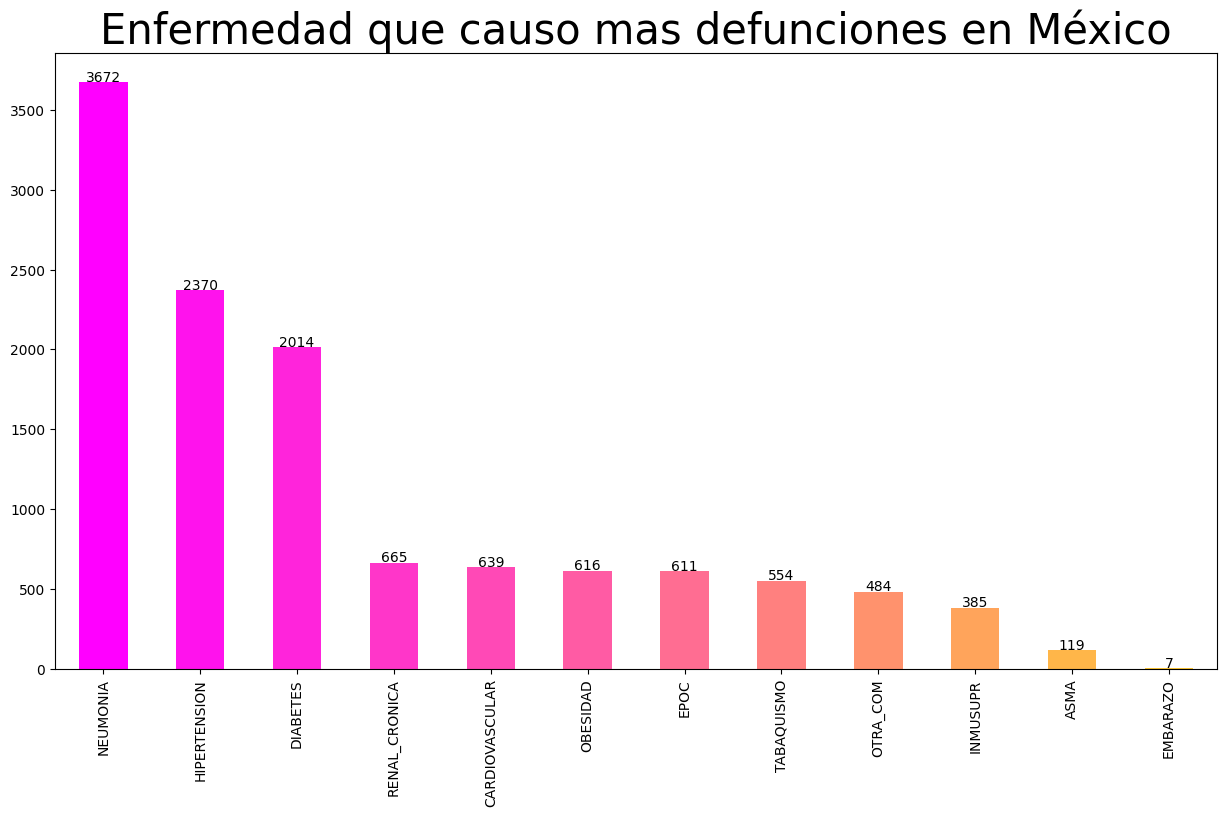

In [ ]:
conteo.plot.bar(color= color ,figsize = (15,8))
plt.title('Enfermedad que causo mas defunciones en México',fontsize= 30)


#mostrar las etiquetas
for i, value in enumerate(conteo):
    plt.text(i, value + 5, str(value), ha='center')

plt.show()

##¿Cuál fue la enfermedad que causo mas defunciones en México? **R: NEUMONIA**

#Pregunta 3

¿Cuál fue el estado con mayor casos positivos COVID?  

Casos positivos en cada estado de México

Total de mujeres y hombres positivos en Puebla

In [ ]:
df.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA_LAB', 'RESULTADO_LAB',
       'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO', 'CLASIFICACION_FINAL',
       'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')

##Eliminar columnas

In [ ]:
columns = ['ENTIDAD_RES','RESULTADO_ANTIGENO','SEXO']

df = df.drop(columns = [col for col in df.columns if col not in columns])

df.columns

Index(['SEXO', 'ENTIDAD_RES', 'RESULTADO_ANTIGENO'], dtype='object')

##Renombrar columnas

In [ ]:
df = df.rename({'ENTIDAD_RES': "clave"}, axis=1)
df.columns

Index(['SEXO', 'clave', 'RESULTADO_ANTIGENO'], dtype='object')

##Merge

In [ ]:
data = pd.merge(df, df_states, how='left', on=["clave"])
data

,SEXO,clave,RESULTADO_ANTIGENO,estado
0,2,16,2,Michoac
1,1,9,2,CDMX
2,1,9,2,CDMX
3,2,7,97,Chiapas
4,2,7,97,Chiapas
...,...,...,...,...
976365,1,15,97,México
976366,1,15,97,México
976367,2,15,2,México
976368,2,15,97,México


##Casos positivos

In [ ]:
positivos = data[data['RESULTADO_ANTIGENO'] == 1]
positivos

,SEXO,clave,RESULTADO_ANTIGENO,estado
9,1,21,1,Puebla
10,1,11,1,Guanajuato
11,2,9,1,CDMX
22,1,9,1,CDMX
25,1,3,1,Baja California Sur
...,...,...,...,...
976300,1,15,1,México
976311,1,15,1,México
976321,1,15,1,México
976329,1,15,1,México


##Contar el acumulado de positivos por estado

In [ ]:
count_states = positivos['estado'].value_counts()
count_states

CDMX                    88054
México                  38621
Nuevo Leon              23077
Guanajuato              16041
Puebla                  12432
Veracruz                11678
Baja California          9469
Jalisco                  8650
Querétaro                8563
San Luis Potosi          8472
Oaxaca                   8072
Hidalgo                  7810
Coahuila de Zaragoza     7114
Michoac                  6917
Morelos                  6451
Sonora                   6272
Tamaulipas               6269
Sinaloa                  5637
Aguascalientes           4969
Nayarit                  4581
Baja California Sur      4488
Yucatan                  4129
Tlaxcala                 4101
Chihuahua                3959
Colima                   3882
Quintana Roo             3862
Guerrero                 3862
Zacatecas                2773
Chiapas                  2351
Durango                  1872
Tabasco                  1349
Campeche                  489
Name: estado, dtype: int64

##Gráfico

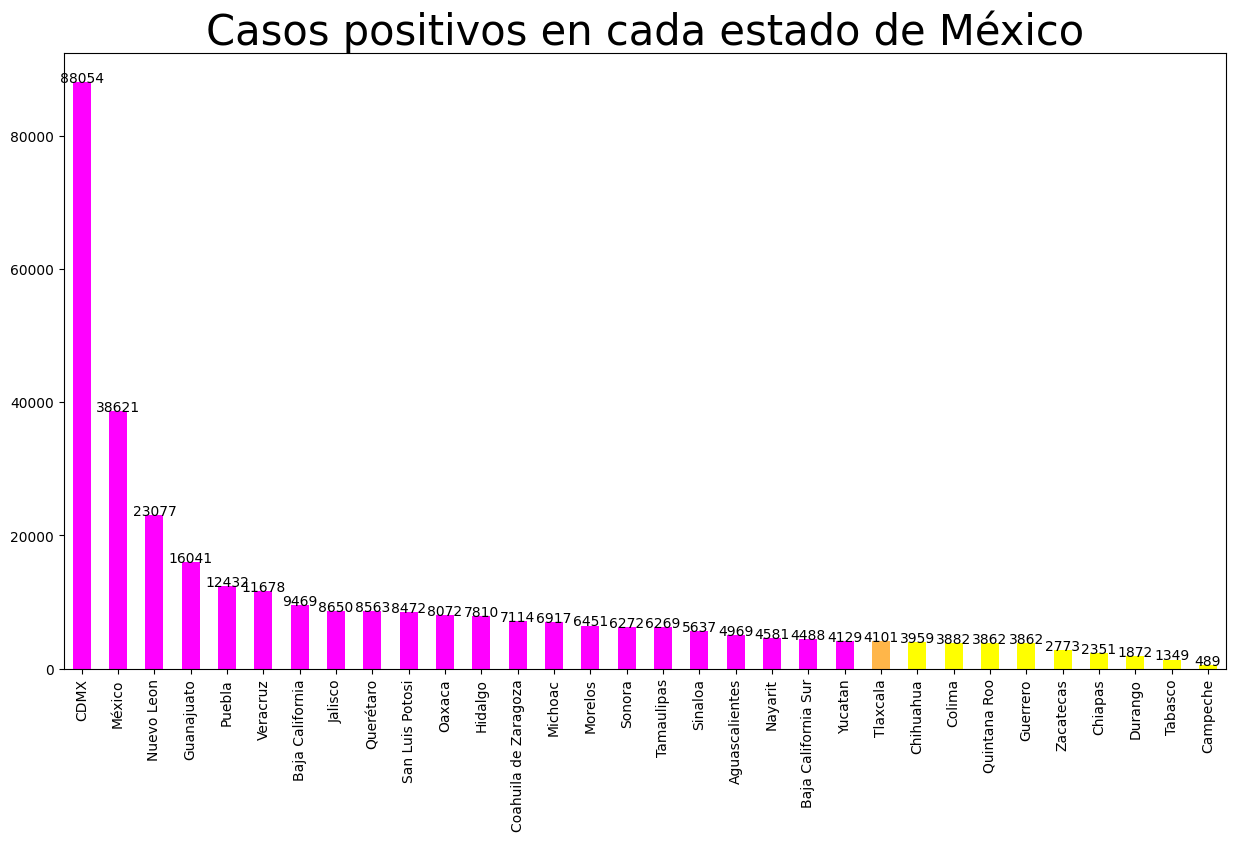

In [ ]:
plt.rcParams['figure.figsize'] = (20,9)
color = plt.cm.spring(np.linspace(-15,20))
#mostrar las etiquetas

count_states.plot.bar(color= color ,figsize = (15,8))
plt.title('Casos positivos en cada estado de México',fontsize= 30)

for i, value in enumerate(count_states):
    plt.text(i, value + 5, str(value), ha='center')

plt.show()

##¿Cuál fue el estado con mayor casos positivos COVID? **R: CDMX**